We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25


Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
tempmax=[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
tempmin=[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [83]:
months=np.arange(12)

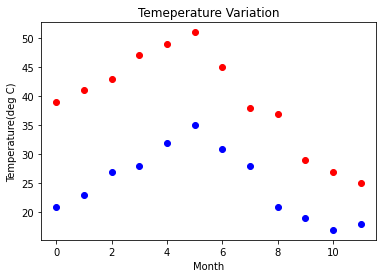

In [5]:
plt.plot(tempmax,color='red',marker='o',linestyle="")
plt.plot(tempmin,color='blue',marker='o',linestyle="")
plt.xlabel('Month')
plt.ylabel('Temperature(deg C)')
plt.title('Temeperature Variation')
plt.show()

In [88]:
from scipy import optimize

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months, tempmax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, tempmin, [-40, 20, 0])

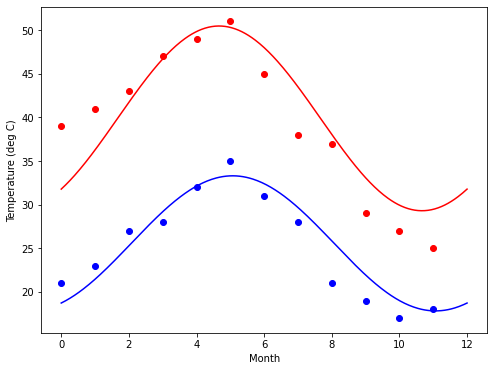

In [94]:
days = np.linspace(0, 12, num=365)

plt.figure(figsize=(8,6))
plt.plot(months, tempmax,color='red',marker='o',linestyle="")
plt.plot(days, yearly_temps(days, *res_max),color='red')
plt.plot(months, tempmin,color='blue',marker='o',linestyle="")
plt.plot(days, yearly_temps(days, *res_min), color='blue')
plt.xlabel('Month')
plt.ylabel('Temperature (deg C)')

plt.show()

Matplotlib:

This assignment is for visualization using matplotlib:

data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [8]:
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [9]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [40]:
genderdata=titanic['sex'].value_counts()
gender=list(titanic['sex'].unique())

In [49]:
gendercleaned=[i for i in gender if i==i ]

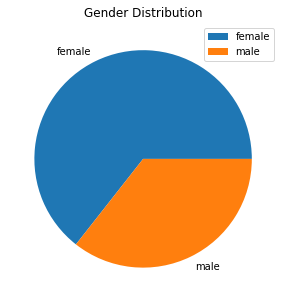

In [50]:
plt.figure(figsize=(5,5))
plt.pie(genderdata,labels=gendercleaned)
plt.title('Gender Distribution')
plt.legend()

In [61]:
titanic[titanic['sex']==gendercleaned[0]]['fare']

0       211.3375
2       151.5500
4       151.5500
6        77.9583
8        51.4792
          ...   
1286      7.2292
1290      7.0000
1300     14.4542
1304     14.4542
1305     14.4542
Name: fare, Length: 466, dtype: float64

Text(0, 0.5, 'Age')

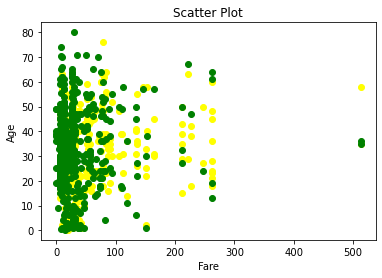

In [67]:
plt.scatter(titanic[titanic['sex']==gendercleaned[0]]['fare'],titanic[titanic['sex']==gendercleaned[0]]['age'],color='yellow')
plt.scatter(titanic[titanic['sex']==gendercleaned[1]]['fare'],titanic[titanic['sex']==gendercleaned[1]]['age'],color='green')
plt.title('Scatter Plot')
plt.xlabel('Fare')
plt.ylabel('Age')